# T2.2 Métodos de optimización de primer orden y SGD

**Índice**

> 1 Introducción<br>
>> 1.1 Optimización local vs global<br>
>>> 1.1.1 Definiciones<br>
>>> 1.1.2 Condiciones de optimalidad local<br>
>>
>> 1.2 Optimización con o sin restricciones<br>
>>> 1.2.1 Optimización sin restricciones<br>
>>> 1.2.2 Optimización con restricciones<br>
>>> 1.2.3 Relajación de restricciones de igualdad<br>
>>> 1.2.4 Relajación de restricciones de desigualdad<br>
>
> 2 Métodos de primer orden<br>
>> 2.1 Método básico<br>
>> 2.2 Dirección de descenso<br>
>>> 2.2.1 Dirección de descenso<br>
>>> 2.2.2 Descenso por gradiente o más pronunciado<br>
>>
>> 2.3 Factor de aprendizaje<br>
>>> 2.3.1 Factor de aprendizaje constante<br>
>>> 2.3.2 Convergencia de descenso por gradiente<br>
>>> 2.3.3 Búsqueda lineal<br>
>>
>> 2.4 Momentum<br>
>>> 2.4.1 Momentum<br>
>>> 2.4.2 Momentum Nesterov<br>
>
> 3 Descenso por gradiente estocástico<br>
>> 3.1 Método básico<br>
>> 3.2 Aplicación a problemas de sumas finitas<br>

<p style="page-break-after:always;"></p>

# 1 Introducción

## 1.1 Optimización local vs global

### 1.1.1 Definiciones

**Optimización global de un objetivo:** $\;$ consiste en hallar un **óptimo global**, esto es, una solución no mejorable por ninguna otra

**Optimización local de un objetivo:** $\;$ más modesta que la global, consiste en hallar un **óptimo local**, es decir, un solución no mejorable por ninguna otra en un entorno local

**Mínimo local (plano):** $\;\,\boldsymbol{\theta}^*\;$ tal que $\;\exists\,\delta>0,\quad\forall\,\boldsymbol{\theta}\in\Theta\,:\,\lVert\boldsymbol{\theta}-\boldsymbol{\theta}^*\rVert<\delta,\quad\mathcal{L}(\boldsymbol{\theta}^*)\leq\mathcal{L}(\boldsymbol{\theta})$

**Mínimo local estricto:** $\;\boldsymbol{\theta}^*\;$ tal que $\;\exists\,\delta>0,\quad\forall\,\boldsymbol{\theta}\in\Theta,\,\boldsymbol{\theta}\neq\boldsymbol{\theta}^*\,:\,\lVert\boldsymbol{\theta}-\boldsymbol{\theta}^*\rVert<\delta,\quad\mathcal{L}(\boldsymbol{\theta}^*)<\mathcal{L}(\boldsymbol{\theta})$

<p style="page-break-after:always;"></p>

### 1.1.2 Condiciones de optimalidad local

**Objetivo, gradiente y Hessiana:** $\;$ sea $\mathcal{L}(\boldsymbol{\theta})$ doblemente diferenciable, con gradiente $\,\boldsymbol{g}(\boldsymbol{\theta})=\nabla\mathcal{L}(\boldsymbol{\theta})\,$ y Hessiana $\,\boldsymbol{H}(\boldsymbol{\theta})=\nabla^2\mathcal{L}(\boldsymbol{\theta})$

**Gradiente y Hessiana en $\boldsymbol{\theta}^*\in\mathbb{R}^D$:** $\qquad\boldsymbol{g}^*=\boldsymbol{g}(\boldsymbol{\theta})\rvert_{\boldsymbol{\theta}^*}\quad$ y $\quad\boldsymbol{H}^*=\boldsymbol{H}(\boldsymbol{\theta})\rvert_{\boldsymbol{\theta}^*}$

**Necesidad de punto estacionario:** $\;\boldsymbol{g}^*=\boldsymbol{0};\;$ si no, $\mathcal{L}(\boldsymbol{\theta}^*)$ puede minorarse a pequeña distancia en la dirección del negativo del gradiente

**Insuficiencia de punto estacionario:** $\;$ $\;\boldsymbol{g}^*=\boldsymbol{0}\;$ también se cumple si $\boldsymbol{\theta}^*$ es máximo local o punto de silla (en 2d)

**Condición suficiente de optimalidad local:** $\,$ si $\,\boldsymbol{g}^*=\boldsymbol{0}\,$ y $\,\boldsymbol{H}^*\,$ es (semi-)definida positiva, $\,\boldsymbol{\theta}^*\,$ es un mínimo local
* $\boldsymbol{H}^*\succeq 0\,$ garantiza que el objetivo no decrece en el entorno del punto, por lo que $\,\boldsymbol{\theta}^*\,$ es mínimo local (plano)
* $\boldsymbol{H}^*\succ 0\,$ garantiza que el objetivo crece en el entorno del punto, por lo que $\,\boldsymbol{\theta}^*\,$ es mínimo local estricto



<p style="page-break-after:always;"></p>

**Ejemplo:** $\qquad\boldsymbol{x}=(x_1, x_2)^t$ $\qquad\boldsymbol{x}^*=\boldsymbol{0}$ $\qquad\mathcal{L}(\boldsymbol{x})=a_1x_1^2+a_2x_2^2, \quad a_1,a_2\neq 0$
$$\boldsymbol{g}(\boldsymbol{x})=(2a_1x_1, 2a_2x_2)\qquad\boldsymbol{g}^*=\boldsymbol{g}(\boldsymbol{x})\rvert_{\boldsymbol{x}^*}=\boldsymbol{0}$$
$$\mathbf{H}(\boldsymbol{x})=\operatorname{diag}(2a_1, 2a_2)\qquad\mathbf{H}^*=\mathbf{H}(\boldsymbol{x})\rvert_{\boldsymbol{x}^*}=\operatorname{diag}(2a_1, 2a_2)=\begin{cases}\succ 0&\text{si}\;a_1, a_2>0\\%
\prec 0&\text{si}\;a_1, a_2<0\\%
\text{indefinida}&a_1, a_2\,\text{de signo opuesto}\end{cases}$$



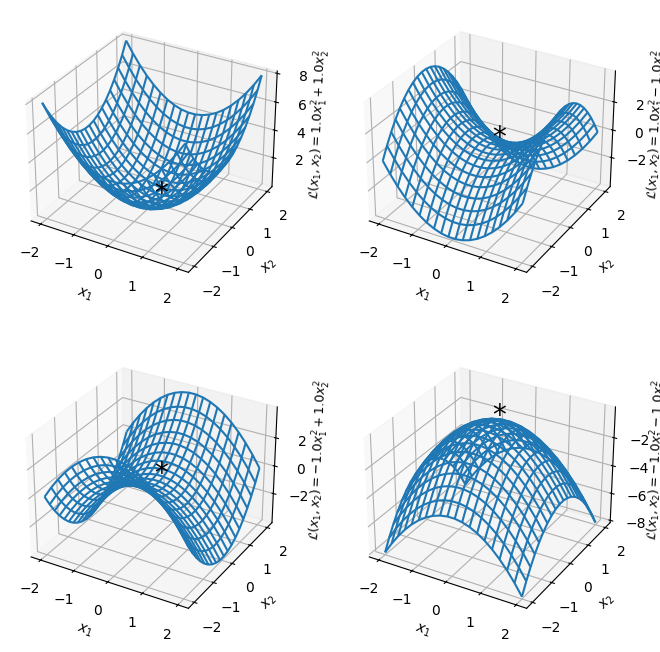

In [1]:
import numpy as np; import matplotlib.pyplot as plt
def L(x1, x2, a=1, b=1):
    return a*x1**2 + b*x2**2
x1, x2 = np.meshgrid(np.linspace(-2, 2, 20), np.linspace(-2, 2, 20))
ab = np.array([[1, 1], [1, -1], [-1, 1], [-1, -1]]).astype(float)
nrows, ncols, size = 2, 2, 4; fig = plt.figure(figsize=(size * ncols, size * nrows)); fig.tight_layout()
for i, abi in enumerate(ab):
    ax = fig.add_subplot(nrows, ncols, i+1, projection='3d')
    ax.set_xlabel('$x_1$', fontsize=10); ax.set_ylabel('$x_2$', fontsize=10)
    zlabel = '${:}x_1^2{:+}x_2^2$'.format(abi[0], abi[1]); ax.zaxis.labelpad=-1
    ax.set_zlabel('$\mathcal{L}(x_1,x_2)=$' + zlabel, fontsize=9)
    ax.text(0, 0, 0, '*', fontsize=20); ax.plot_wireframe(x1, x2, L(x1, x2, a=abi[0], b=abi[1]))

<p style="page-break-after:always;"></p>

## 1.2 Optimización con o sin restricciones

### 1.2.1 Optimización sin restricciones

**Optimización sin restricciones:** $\;$ cualquier valor del espacio paramétrico $\mathbf{\Theta}$ es **solución posible** para minimizar la pérdida

### 1.2.2 Optimización con restricciones

**Optimización con restricciones:** $\;$ sujeta a (que el valor hallado pertenezca a) un cierto **conjunto de soluciones posibles** $\mathcal{C}\subseteq\mathbf{\Theta}$,
$$\boldsymbol{\theta}^*=\operatorname*{argmin}\limits_{\boldsymbol{\theta}\in\mathcal{C}}\;%
\mathcal{L}(\boldsymbol{\theta})$$
$\mathcal{C}$ suele caracterizarse con **restricciones de desigualdad**, $g_j(\boldsymbol{\theta})\leq 0$ para $j\in\mathcal{I}$, y **restricciones de igualdad**, $h_k(\boldsymbol{\theta})=0$ para $k\in\mathcal{E}$:
$$\mathcal{C}=\{\boldsymbol{\theta}:%
g_j(\boldsymbol{\theta})\leq 0: j\in\mathcal{I},\;%
h_k(\boldsymbol{\theta})=0: k\in\mathcal{E}\}\subseteq\mathbb{R}^D$$

**Adición de restricciones:** $\;$ puede cambiar el número de óptimos y, por lo general, complica la búsqueda de soluciones posibles

**Relajación de restricciones:** $\;$ estrategia usual de simplificación de problemas que consiste en **relajar** (eliminar) restricciones y añadir un **término de penalización** al objetivo por cada restricción relajada

<p style="page-break-after:always;"></p>

### 1.2.3 Relajación de restricciones de igualdad

Las restricciones de igualdad se "suben" al objetivo junto con **multiplicadores de Lagrange** para construir un objetivo extendido o **Lagrangiana**,
$$\boldsymbol{\theta}^*=\operatorname*{argmin}\limits_{\boldsymbol{\theta}\in\mathcal{C}^{\leq 0}}\;%
\min\limits_{\boldsymbol{\lambda}\in\mathbb{R}^{\lvert\mathcal{E}\rvert}}\;%
L(\boldsymbol{\theta}, \boldsymbol{\lambda})\;
\quad\text{con}\quad%
L(\boldsymbol{\theta}, \boldsymbol{\lambda})=\mathcal{L}(\boldsymbol{\theta})%
+\sum_{k\in\mathcal{E}}\lambda_kh_k(\boldsymbol{\theta})$$
Todo **punto crítico** (estacionario) de la Lagrangiana requiere el cumplimiento de las restricciones:
$$\boldsymbol{\nabla}_{\boldsymbol{\theta}, \boldsymbol{\lambda}}L(\boldsymbol{\theta}, \boldsymbol{\lambda})=\boldsymbol{0}%
\qquad\text{sii}\qquad%
\boldsymbol{\nabla}_{\boldsymbol{\theta}}\mathcal{L}(\boldsymbol{\theta})%
+\sum_{k\in\mathcal{E}}\lambda_k\boldsymbol{\nabla}_{\boldsymbol{\theta}}h_k(\boldsymbol{\theta})=\boldsymbol{0}%
\quad\text{y}\quad%
h_k(\boldsymbol{\theta})=0\;\;\text{para $\,k\in\mathcal{E}$}$$

### 1.2.4 Relajación de restricciones de desigualdad

Las restricciones de desigualdad (p.e. de no negatividad) pueden relajarse de manera parecida a las de igualdad, aunque muchas veces se ignoran sin más y simplemente comprobamos que la solución hallada (sin tenerlas en cuenta) las satisface

<p style="page-break-after:always;"></p>

# 2 Métodos de primer orden

## 2.1 Método básico


**Métodos de primer orden:** $\;$ métodos iterativos basados en derivadas de primer orden del objetivo

**Método básico:** $\;$ dado un punto de inicio $\boldsymbol{\theta}_0,\,$ la iteración $t$ consiste en hacer un paso de actualización (de $\boldsymbol{\theta}$)
$$\boldsymbol{\theta}_{t+1}=\boldsymbol{\theta}_t+\eta_t\boldsymbol{d}_t$$

* $\eta_t$ es el **tamaño del paso (step size)** o **factor de aprendizaje (learning rate)**
* $\boldsymbol{d}_t$ es una **dirección de descenso** como el negativo del **gradiente**, dado por $\boldsymbol{g}_t=\mathbf{\nabla}\mathcal{L}(\boldsymbol{\theta})\rvert_{\boldsymbol{\theta}_t}$
* los pasos de actualización se suceden hasta que el método alcanza un punto estacionario, esto es, de gradiente nulo

<p style="page-break-after:always;"></p>

## 2.2 Dirección de descenso

### 2.2.1 Dirección de descenso

**Dirección de descenso:** $\;\boldsymbol{d}$ es de descenso si existe un $\eta_{\text{max}}>0$ tal que
$$\mathcal{L}(\boldsymbol{\theta}+\eta\boldsymbol{d})<\mathcal{L}(\boldsymbol{\theta})%
\qquad\text{para todo}\;\eta\in(0, \eta_{\text{max}})$$

**Dirección de máximo ascenso:** $\;$ gradiente en $\boldsymbol{\theta}_t,\,$ $\boldsymbol{g}_t=\mathbf{\nabla}\mathcal{L}(\boldsymbol{\theta})\rvert_{\boldsymbol{\theta}_t}=\mathbf{\nabla}\mathcal{L}(\boldsymbol{\theta}_t)=\boldsymbol{g}(\boldsymbol{\theta}_t)$

**Dirección de máximo descenso:** $\;$ neg-gradiente

**Caracterización de dirección de descenso $\boldsymbol{d}_t$:** $\quad\boldsymbol{d}_t^t\boldsymbol{g}_t<0\quad$ ($\boldsymbol{d}_t$ y $\boldsymbol{g}_t$ forman un ángulo mayor de $90$ grados en el plano que los contiene)

**Direcciones de descenso usuales:** $\;\boldsymbol{d}_t=-\mathbf{B}_t\boldsymbol{g}_t\;$ con $\;\mathbf{B}_t\succ 0$

<p style="page-break-after:always;"></p>

### 2.2.2 Descenso por gradiente o más pronunciado

**Gradient o steepest descent:** $\;$ escoge el neg-gradiente como dirección de descenso, $\,\boldsymbol{\theta}_{t+1}=\boldsymbol{\theta}_t-\eta_t\boldsymbol{g}_t$

**Ejemplo:** $\;\mathcal{L}(\theta)=\theta^2$, $\theta_0=10$, $\eta_t=0.2$, tolerancia $0.01$

In [1]:
import numpy as np
grad, theta, eta, tol, delta = lambda t: 2*t, 10.0, 0.2, 0.01, np.inf
while np.abs(delta) > tol:
	delta = -eta * grad(theta)
	theta += delta
	print(np.round(delta, 4), np.round(theta, 4))

-4.0 6.0
-2.4 3.6
-1.44 2.16
-0.864 1.296
-0.5184 0.7776
-0.311 0.4666
-0.1866 0.2799
-0.112 0.168
-0.0672 0.1008
-0.0403 0.0605
-0.0242 0.0363
-0.0145 0.0218
-0.0087 0.0131


<p style="page-break-after:always;"></p>

## 2.3 Factor de aprendizaje

**Learning rate schedule:** $\;$ secuencia de tamaños de paso $\{\eta_t\}$

### 2.3.1 Factor de aprendizaje constante

**Tamaño de paso constante:** $\;$ es la opción más sencilla, $\quad\eta_t=\eta$

**Ejemplo:** $\qquad\boldsymbol{\theta}=(\theta_1,\theta_2)^t$ $\qquad\mathcal{L}(\boldsymbol{\theta})=0.5(\theta_1^2-\theta_2)^2+0.5(\theta_1-1)^2$

$\;\mathbf{\nabla}\mathcal{L}(\boldsymbol{\theta})=(2\theta_1(\theta_1^2-\theta_2)+\theta_1-1, \theta_2-\theta_1^2)^t$ $\qquad\boldsymbol{\theta}_0=\boldsymbol{0}$ $\qquad\eta_t=0.3$ $\qquad$ tolerancia $0.01$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
def plot_8_2_2(ax, x, y, L, TH, levels=30, shrink=0.8):
    X, Y = np.meshgrid(x, y); XY = np.c_[np.ravel(X), np.ravel(Y)]; LL = np.apply_along_axis(L, 1, XY)
    ax.contour(X, Y, LL.reshape(X.shape), levels, colors='orange')
    cp = ax.contourf(X, Y, LL.reshape(X.shape), levels, cmap='Greys')
    plt.colorbar(cp, ax=ax, shrink=shrink)
    T = TH.shape[0]; lines = np.hstack((TH[:-1, :], TH[1:, :])).reshape(T-1, 2, 2)
    ax.add_collection(LineCollection(lines, colors='black', linestyle='solid'));
    ax.scatter(TH[:, 0], TH[:, 1], s=15, c='black', marker='o')

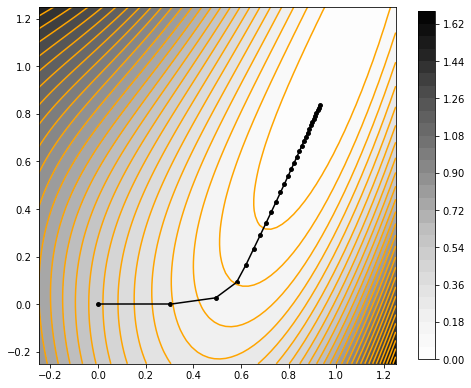

In [2]:
import numpy as np
import matplotlib.pyplot as plt
eta = 0.3 # <--- con otros valores no converge o lo hace muy lentamente
L = lambda th: 0.5 * np.square(np.square(th[0]) - th[1]) + 0.5 * np.square(th[0] - 1)
grad = lambda th: np.array([2 * th[0] * (np.square(th[0]) - th[1]) + th[0] - 1, th[1] - np.square(th[0])])
T = 100; TH = np.zeros((T, 2)); tol = 0.01; delta = np.inf; t = 1
while np.max(np.abs(delta)) > tol and t < T:
    delta = -eta * grad(TH[t-1, :]); TH[t, :] = TH[t-1, :] + delta; t = t + 1
th1, th2 = np.linspace(-0.25, 1.25, num=64), np.linspace(-0.25, 1.25, num=64)
fig, ax = plt.subplots(1, 1, figsize=(8, 8)); ax.set(aspect='equal')
plot_8_2_2(ax, th1, th2, L, TH[:t, :]);

<p style="page-break-after:always;"></p>

### 2.3.2 Convergencia de descenso por gradiente

**En general:** $\;$ puede no converger si $\eta$ es muy grande, o hacerlo muy lentamente si es muy pequeño

**Objetivo cuadrático:** $\,$ si $\,\mathcal{L}(\boldsymbol{\theta})=\frac{1}{2}\boldsymbol{\theta}^t\mathbf{A}\boldsymbol{\theta}+\boldsymbol{b}^t\boldsymbol{\theta}+c,\,$ $\,\mathbf{A}\succeq\boldsymbol{0},\,$ converge si $\eta$ se acota con la pendiente más pronunciada, $\lambda_{\text{max}}(\mathbf{A})$
$$\eta<\frac{2}{\lambda_{\text{max}}(\mathbf{A})}$$

**Gradiente Lipschitz con $L>0$:** $\;$ converge si $\eta<\frac{2}{L},\,$ pero $L$ suele ser desconocida 

<p style="page-break-after:always;"></p>

### 2.3.3 Búsqueda lineal

**Búsqueda lineal:** $\;$ halla el paso óptimo en la dirección escogida, $\,\eta_t=\operatorname*{argmin}\limits_{\eta>0}\;\phi_t(\eta)\,$ con $\,\phi_t(\eta)=\mathcal{L}(\boldsymbol{\theta}_t+\eta\boldsymbol{d}_t)$

**Búsqueda lineal exacta:** $\;$ si $\mathcal{L}$ es convexa, la búsqueda lineal puede resolverse analíticamente

**Ejemplo de búsqueda lineal exacta:** $\,\mathcal{L}(\boldsymbol{\theta})=\frac{1}{2}\boldsymbol{\theta}^t\mathbf{A}\boldsymbol{\theta}+\boldsymbol{b}^t\boldsymbol{\theta}+c$
$$\begin{align*}
\frac{d\phi(\eta)}{d\eta}&=\frac{d}{d\eta}\left[\frac{1}{2}(\boldsymbol{\theta}+\eta\boldsymbol{d})^t\mathbf{A}(\boldsymbol{\theta}+\eta\boldsymbol{d})+\boldsymbol{b}^t(\boldsymbol{\theta}+\eta\boldsymbol{d})+c\right]\\
&=\boldsymbol{d}^t\mathbf{A}(\boldsymbol{\theta}+\eta\boldsymbol{d})+\boldsymbol{d}^t\boldsymbol{b}\\
&=\boldsymbol{d}^t(\mathbf{A}\boldsymbol{\theta}+\boldsymbol{b})+\eta\boldsymbol{d}^t\mathbf{A}\boldsymbol{d}%
\overset{!}{=}0\to\eta=-\frac{\boldsymbol{d}^t(\mathbf{A}\boldsymbol{\theta}+\boldsymbol{b})}{\boldsymbol{d}^t\mathbf{A}\boldsymbol{d}}
\end{align*}$$


**Búsqueda lineal aproximada:** $\;$ emplea algún método eficiente que garantice una reducción suficiente del objetivo

**Método de backtracking Armijo:** $\;$ parte del $\eta$ actual o uno grande y lo reduce iterativamente mediante un factor $\beta\in(0, 1)$ hasta cumplir la **condición de Armijo-Goldstein**, $\,\mathcal{L}(\boldsymbol{\theta}_t+\eta\boldsymbol{d}_t)\leq\mathcal{L}(\boldsymbol{\theta}_t)+c\,\eta\,\boldsymbol{d}_t^t\,\boldsymbol{g}_t,\,$ donde $\,c\in(0,1)\,$ es una constante, típicamente $c=10^{-4}$

<p style="page-break-after:always;"></p>

## 2.4 Momentum


**Momentum en física:** $\;$ producto de la masa de un cuerpo por su velocidad instantánea; se conserva en un sistema cerrado

**Momentum en descenso por gradiente:** $\;$ heurísticos para acelerar la convergencia en regiones llanas de la pérdida

### 2.4.1 Momentum

**Momentum:** $\;$ acelera el movimiento en direcciones previamente buenas y lo frena en las que el gradiente ha cambiado súbitamente, como una bola pesada rodando montaña abajo; dada una constante $\beta\in[0,1)$ ($\beta=0.9$), el momentum $\boldsymbol{m}_t$ se aplica como sigue:
$$\begin{align*}
\boldsymbol{m}_{t+1}&=\beta\boldsymbol{m}_t+\boldsymbol{g}_t\\%
\boldsymbol{\theta}_{t+1}&=\boldsymbol{\theta}_t-\eta_t\boldsymbol{m}_{t+1}
\end{align*}$$

**Interpretación:** $\;$ con $\beta=0$ es descenso por gradiente; si no, es una media movil ponderada exponencialmente **(EWMA)**
$$\boldsymbol{m}_t=\beta\boldsymbol{m}_{t-1}+\boldsymbol{g}_{t-1}%
=\beta^2\boldsymbol{m}_{t-2}+\beta\boldsymbol{g}_{t-2}+\boldsymbol{g}_{t-1}%
=\cdots=\sum_{\tau=0}^{t-1}\beta^{\tau}\boldsymbol{g}_{t-\tau-1}%
\overset{\{\boldsymbol{m}_t\}=\boldsymbol{g}}{=}\boldsymbol{g}\sum_{\tau=0}^{t-1}\beta^{\tau}%
\overset{t\to\infty}{=}\frac{\boldsymbol{g}}{1-\beta}%
\overset{\beta=0.9}{=}10\,\boldsymbol{g}$$

**Incoveniente:** $\;$ oscila al final del valle por no frenar bastante

<p style="page-break-after:always;"></p>

**Ejemplo (cont.):** $\;\mathbf{A}=\begin{pmatrix}20&5\\5&16\end{pmatrix}\,$ bien condicionada y 
$\;\mathbf{A}=\begin{pmatrix}20&5\\5&2\end{pmatrix}\,$ peor condicionada; $\;\boldsymbol{b}=(-14, -6)^t$, $\;c=10$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
def plot_8_2_4(ax, x, y, L, TH, levels=30, shrink=0.8):
    X, Y = np.meshgrid(x, y); XY = np.c_[np.ravel(X), np.ravel(Y)]; LL = np.apply_along_axis(L, 1, XY)
    ax.contour(X, Y, LL.reshape(X.shape), levels, colors='orange')
    cp = ax.contourf(X, Y, LL.reshape(X.shape), levels, cmap='Greys')
    plt.colorbar(cp, ax=ax, shrink=shrink)
    T = TH.shape[0]; lines = np.hstack((TH[:-1, :], TH[1:, :])).reshape(T-1, 2, 2)
    ax.add_collection(LineCollection(lines, colors='black', linestyle='solid'));
    ax.scatter(TH[:, 0], TH[:, 1], s=15, c='black', marker='o')

Número de condición:  30.2336
Theta:  [-0.06685106  1.66676201]  L(Theta):  3.201004965606007  Iteraciones:  81


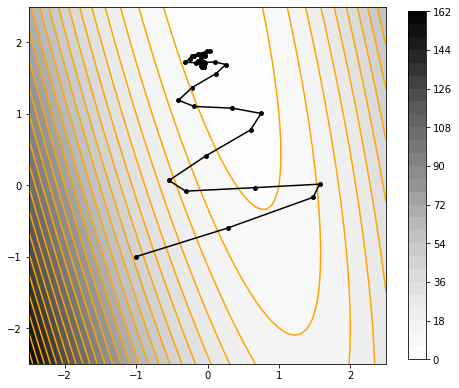

In [2]:
import numpy as np
import matplotlib.pyplot as plt
beta = 0.8 # <--- prueba otros valores
eta = 0.02 # <--- con otros valores no converge o lo hace muy lentamente
# A, b, c = np.array([ [20, 5], [5, 16] ]), np.array([-14, -6]), 10 # <--- bien condicionada
A, b, c = np.array([ [20, 5], [5,  2] ]), np.array([-14, -6]), 10 # <--- mal condicionada
print("Número de condición: ", np.round(np.linalg.cond(A), 4))
L = lambda th: 0.5 * th.T @ A @ th + b @ th + c
grad = lambda th: (A + A.T) @ th + b
T = 1000; TH = np.zeros((T, 2)); TH[0, :] = np.array([-1.0, -1.0])
tol = 1e-4; delta = np.inf; t = 1; m = np.zeros(2)
while np.max(np.abs(delta)) > tol and t < T:
    m = beta * m + grad(TH[t-1, :]); delta = -eta * m; TH[t, :] = TH[t-1, :] + delta; t = t + 1
th1, th2 = np.linspace(-2.5, 2.5, num=64), np.linspace(-2.5, 2.5, num=64)
fig, ax = plt.subplots(1, 1, figsize=(8, 8)); ax.set(aspect='equal')
plot_8_2_4(ax, th1, th2, L, TH[:t, :])
print("Theta: ", TH[t-1, :], " L(Theta): ", L(TH[t-1, :]), " Iteraciones: ", t-1)

<p style="page-break-after:always;"></p>

### 2.4.2 Momentum Nesterov

**Gradiente acelerado de Nesterov:** $\;$ añade un paso de extrapolación a descenso por gradiente que actúa a modo de "mirada al futuro" **(look-ahead)** para amortiguar oscilaciones
$$\begin{align*}
\tilde{\boldsymbol{\theta}}_{t+1}&=\boldsymbol{\theta}_t+\beta_t(\boldsymbol{\theta}_t-\boldsymbol{\theta}_{t-1})\\%
\boldsymbol{\theta}_{t+1}&=\tilde{\boldsymbol{\theta}}_{t+1}-\eta_t\nabla\mathcal{L}(\tilde{\boldsymbol{\theta}}_{t+1})%
\end{align*}$$

**Momentum Nesterov:** $\;$ gradiente acelerado de Nesterov expresado como momentum
$$\begin{align*}
\boldsymbol{m}_{t+1}&=\beta\boldsymbol{m}_t-\eta_t\nabla\mathcal{L}(\boldsymbol{\theta}_t+\beta\boldsymbol{m}_t)\\%
\boldsymbol{\theta}_{t+1}&=\boldsymbol{\theta}_t+\boldsymbol{m}_{t+1}%
\end{align*}$$

Número de condición:  30.2336
Theta:  [-0.06550228  1.66217315]  L(Theta):  3.2053374263477625  Iteraciones:  49


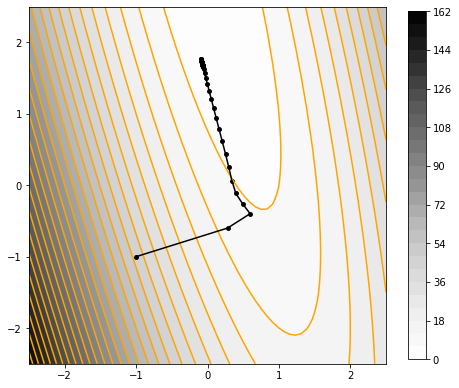

In [3]:
import numpy as np
import matplotlib.pyplot as plt
beta = 0.8 # <--- prueba otros valores
eta = 0.02 # <--- con otros valores no converge o lo hace muy lentamente
# A, b, c = np.array([ [20, 5], [5, 16] ]), np.array([-14, -6]), 10 # <--- bien condicionada
A, b, c = np.array([ [20, 5], [5,  2] ]), np.array([-14, -6]), 10 # <--- mal condicionada
print("Número de condición: ", np.round(np.linalg.cond(A), 4))
L = lambda th: 0.5 * th.T @ A @ th + b @ th + c
grad = lambda th: (A + A.T) @ th + b
T = 1000; TH = np.zeros((T, 2)); TH[0, :] = np.array([-1.0, -1.0])
tol = 1e-4; delta = np.inf; t = 1; m = np.zeros(2)
while np.max(np.abs(delta)) > tol and t < T:
    m = beta * m - eta * grad(TH[t-1, :] + beta * m); delta = m; TH[t, :] = TH[t-1, :] + delta; t = t + 1
th1, th2 = np.linspace(-2.5, 2.5, num=64), np.linspace(-2.5, 2.5, num=64)
fig, ax = plt.subplots(1, 1, figsize=(8, 8)); ax.set(aspect='equal')
plot_8_2_4(ax, th1, th2, L, TH[:t, :])
print("Theta: ", TH[t-1, :], " L(Theta): ", L(TH[t-1, :]), " Iteraciones: ", t-1)

<p style="page-break-after:always;"></p>

# 3 Descenso por gradiente estocástico

## 3.1 Método básico

**Optimización estocástica:** $\;$ minimiza el valor esperado del objetivo con respecto a cierta variable aleatoria $\boldsymbol{z}$ añadida
$$\mathcal{L}(\boldsymbol{\theta})=\mathbb{E}_{q(\boldsymbol{z})}[\mathcal{L}(\boldsymbol{\theta},\boldsymbol{z})]$$

**Stochastic gradient descent (SGD):** $\;$ en la iteración $t$ observamos $\;\mathcal{L}_t(\boldsymbol{\theta})=\mathcal{L}(\boldsymbol{\theta},\boldsymbol{z}_t)\;$ con $\,\boldsymbol{z}_t\sim q$
$$\boldsymbol{\theta}_{t+1}=\boldsymbol{\theta}_t-\eta_t\,\nabla\mathcal{L}(\boldsymbol{\theta}_t,\boldsymbol{z}_t)=\boldsymbol{\theta}_t-\eta_t\,\boldsymbol{g}_t$$
donde $\nabla\mathcal{L}(\boldsymbol{\theta}_t,\boldsymbol{z}_t)$ es un estimador insesgado del gradiente de $\mathcal{L}$;
por ejemplo, $\boldsymbol{g}_t=\nabla_{\boldsymbol{\theta}}\mathcal{L}_t(\boldsymbol{\theta}_t)\,$ si $\,q(\boldsymbol{z})$ no depende de $\boldsymbol{\theta}$

**Convergencia de SGD:** $\;$ si $\boldsymbol{g}_t$ es insesgado, converge a un punto estacionario

<p style="page-break-after:always;"></p>

## 3.2 Aplicación a problemas de sumas finitas

**Problema de sumas finitas:** $\;$ por ejemplo, minimizar el riesgo empírico
$$\mathcal{L}(\boldsymbol{\theta}_t)=\frac{1}{N}\sum_{n=1}^N\ell(\boldsymbol{y}_n,f(\boldsymbol{x}_n;\boldsymbol{\theta}_t))%
=\frac{1}{N}\sum_{n=1}^N\mathcal{L}_n(\boldsymbol{\theta}_t)$$

**Gradiente del riesgo empírico:**
$$\boldsymbol{g}_t=\frac{1}{N}\sum_{n=1}^N\nabla_{\boldsymbol{\theta}}\mathcal{L}_n(\boldsymbol{\theta}_t)%
=\frac{1}{N}\sum_{n=1}^N\nabla_{\boldsymbol{\theta}}\ell(\boldsymbol{y}_n,f(\boldsymbol{x}_n;\boldsymbol{\theta}_t))$$

**Minibatch:** $\;\mathcal{B}_t$, muestreo de $B\ll N$ muestras en la iteración $t$, a partir del cual obtenemos un estimador insesgado de $\boldsymbol{g}_t$
$$\boldsymbol{g}_t%
\approx\frac{1}{\lvert{\mathcal{B}_t}\rvert}\sum_{n\in\mathcal{B}_t}\nabla_{\boldsymbol{\theta}}\mathcal{L}_n(\boldsymbol{\theta}_t)%
=\frac{1}{\lvert{\mathcal{B}_t}\rvert}\sum_{n\in\mathcal{B}_t}\nabla_{\boldsymbol{\theta}}\ell(\boldsymbol{y}_n,f(\boldsymbol{x}_n;\boldsymbol{\theta}_t))$$